In [3]:
import cleaners as cleaners

game_settings = {

    #File implementing the agent playing as player 1
    "player1": "my_agent.py",

    # File implementing the agent playing as player 2
    "player2": "random_agent.py",

    # Size of the game grid (Y,X)
    "gridSize": (41,41),

    # Number of vacuum cleaners
    "nCleaners": 40,

    # Number of turns per game
    "nTurns": 100,

    # Speed of visualisation ('slow','normal','fast')
    "visSpeed": 'fast',

    # Visualisation resolution
    "visResolution": (1280, 720),

    # Wheter to save final games
    "saveFinalGames": True,

    "seed": None   # seed for 1 game choices, None for random seed
}

fitnesses = cleaners.run_game(game_settings)


Training M-0 against random_agent.py for 150 generations...
------
  Gen   1/300...  avg_fitness:  2.25e-01
  Gen   2/300...  avg_fitness:  4.12e-01
  Gen   3/300...  avg_fitness:  5.33e-01
  Gen   4/300...  avg_fitness:  5.50e-01
  Gen   5/300...  avg_fitness:  5.90e-01
  Gen   6/300...  avg_fitness:  5.75e-01
  Gen   7/300...  avg_fitness:  5.64e-01
  Gen   8/300...  avg_fitness:  5.56e-01
  Gen   9/300...  avg_fitness:  5.39e-01
  Gen  10/300...  avg_fitness:  5.55e-01
  Gen  11/300...  avg_fitness:  9.00e-01
  Gen  12/300...  avg_fitness:  8.50e-01
  Gen  13/300...  avg_fitness:  9.00e-01
  Gen  14/300...  avg_fitness:  9.38e-01
  Gen  15/300...  avg_fitness:  1.04e+00
  Gen  16/300...  avg_fitness:  1.14e+00
  Gen  17/300...  avg_fitness:  1.11e+00
  Gen  18/300...  avg_fitness:  1.16e+00
  Gen  19/300...  avg_fitness:  1.24e+00
  Gen  20/300...  avg_fitness:  1.24e+00
  Gen  21/300...  avg_fitness:  2.15e+00
  Gen  22/300...  avg_fitness:  2.00e+00
  Gen  23/300...  avg_fitness:

Text(0, 0.5, 'Average fitness')

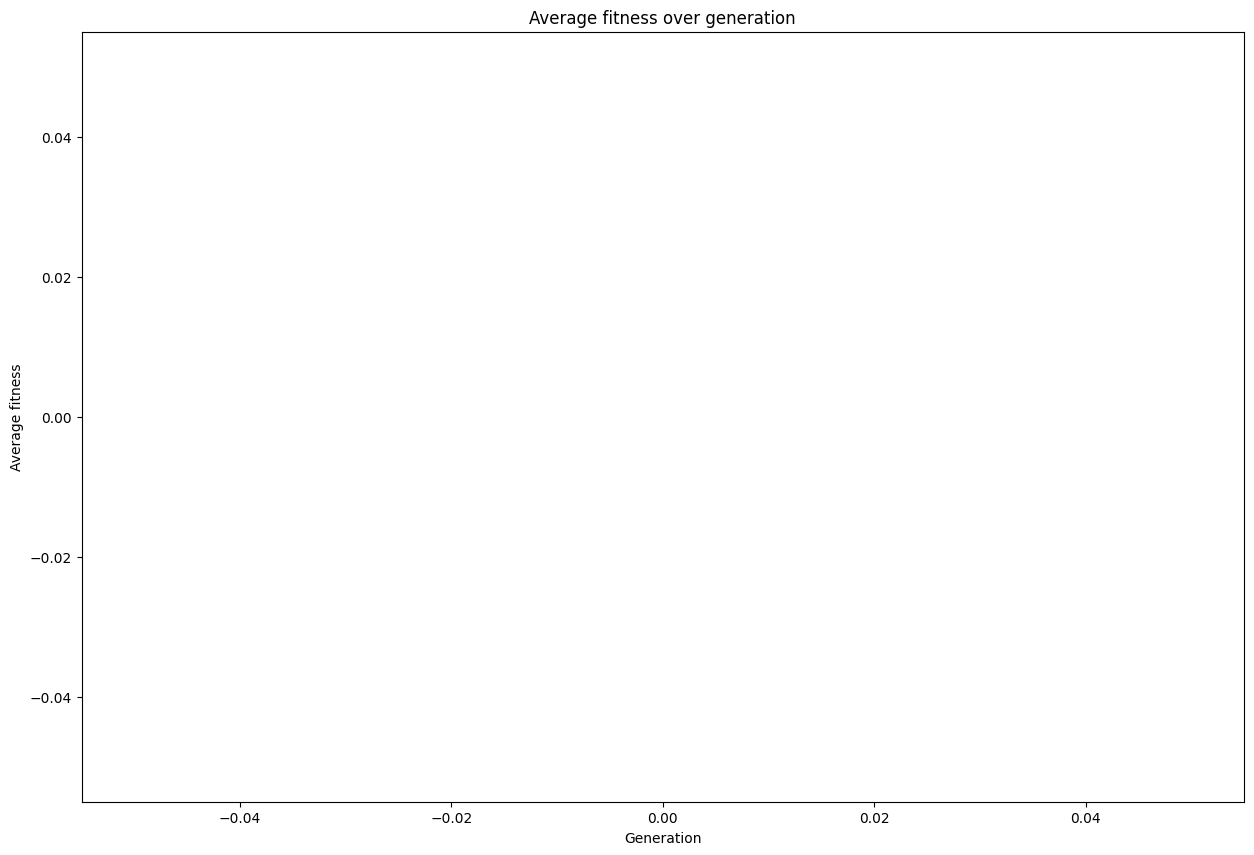

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

fitness_series = pd.Series(fitnesses.players[0].fitness)

plt.figure(figsize=(15, 10))
plt.plot(fitness_series)
plt.title("Average fitness over generation")
plt.xlabel("Generation")
plt.ylabel("Average fitness")

In [3]:
fitness_series.to_csv("trials/fitness_cleaned/averages_150rand_150self_10avg_kpoint_larger_biases.csv")

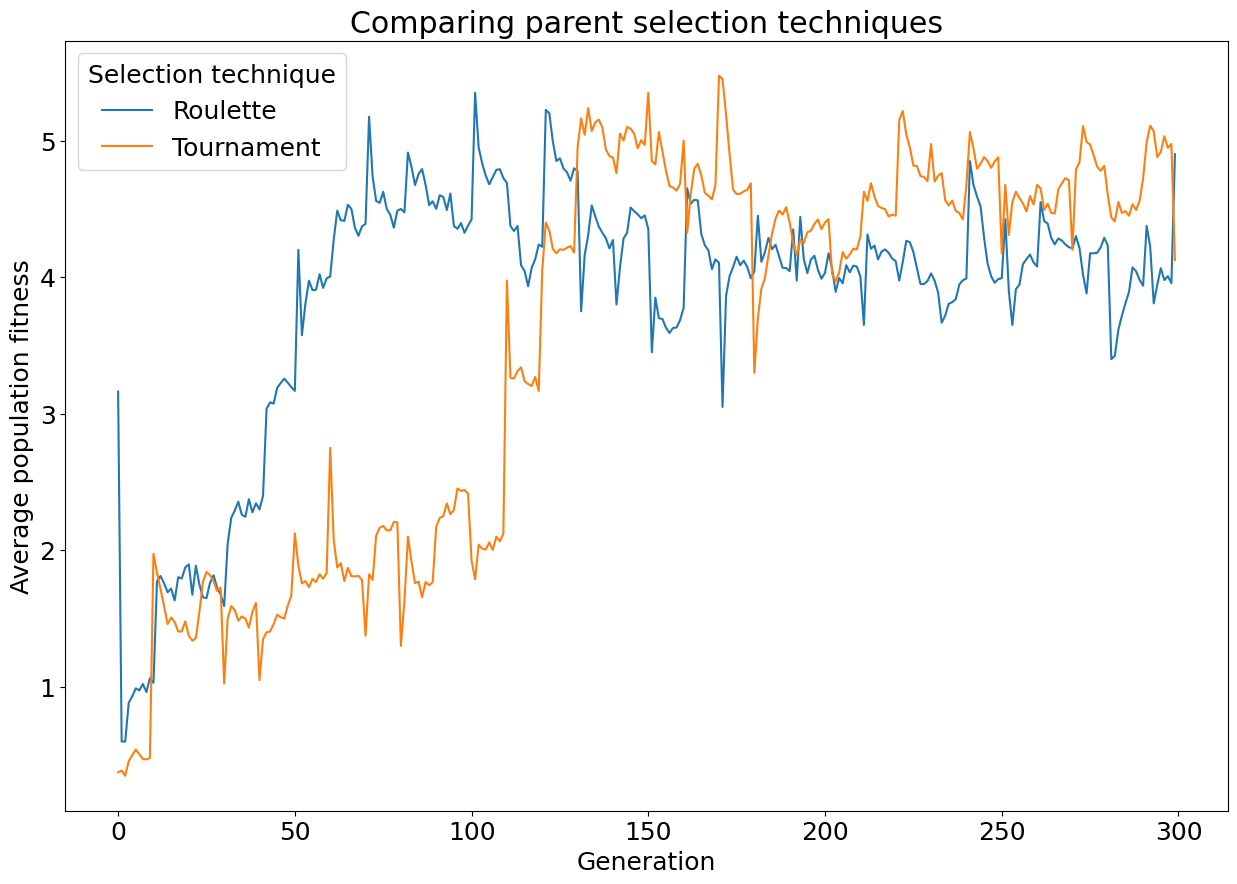

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({"font.size" : 18})

roulette_series = pd.read_csv("trials/roulette/averages_150rand_150self_10avg_runco.csv", index_col=0, header=None)[1]
tournament_series = pd.read_csv("trials/fitness_cleaned/averages_150rand_150self_10avg_runco.csv", index_col=0, header=None)[1]

selection_df = pd.DataFrame({"Roulette": roulette_series, "Tournament": tournament_series})

plt.figure(figsize=(15, 10))
plt.plot(selection_df)
plt.legend(labels = selection_df.columns, title="Selection technique")
plt.title("Comparing parent selection techniques")
plt.xlabel("Generation")
plt.ylabel("Average population fitness")
plt.savefig("plots/avg_fit_150rand_150self_averages_10avg_roulette_vs_tournament_runco", dpi=300)

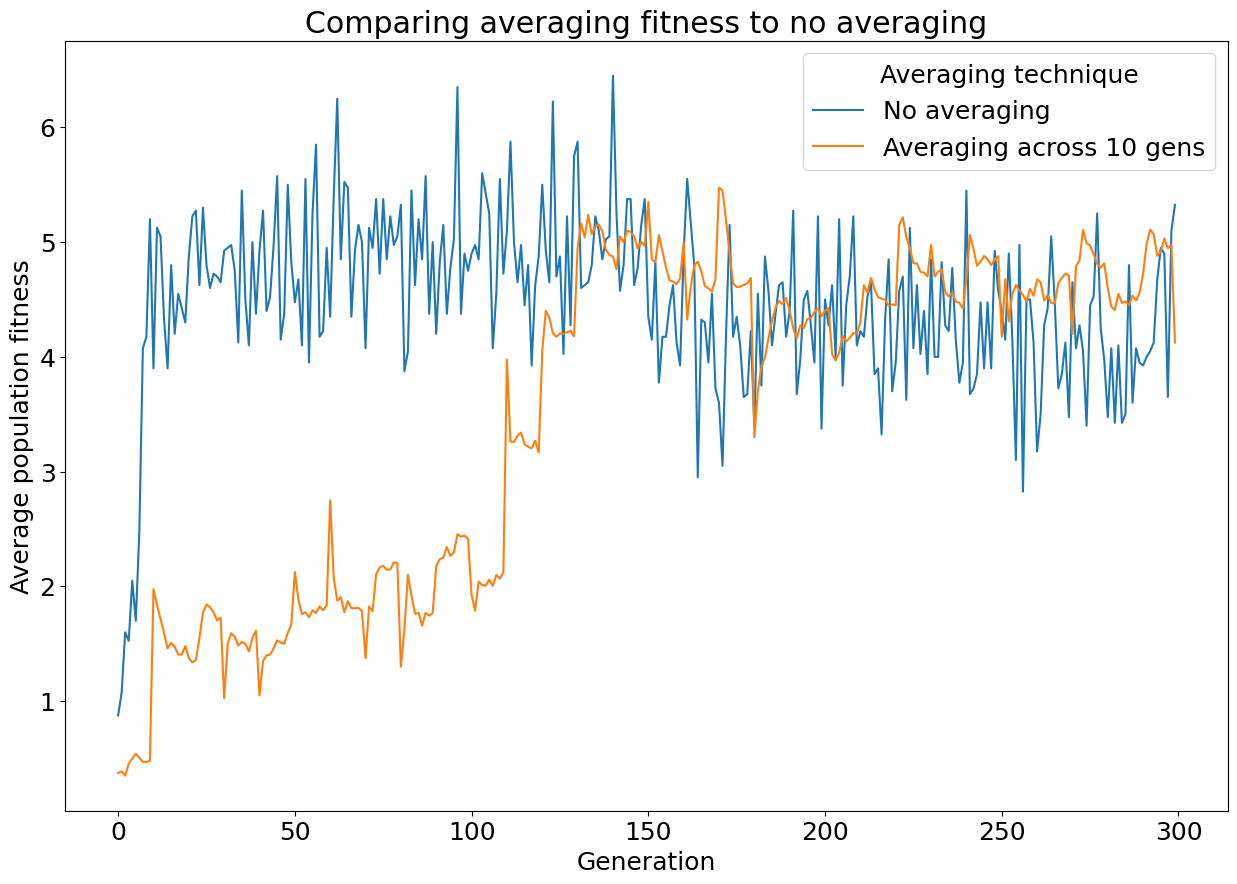

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({"font.size" : 18})

noavg_series = pd.read_csv("trials/fitness_cleaned/averages_150rand_150self_noavg_runco.csv", index_col=0, header=None)[1]
avg_series = pd.read_csv("trials/fitness_cleaned/averages_150rand_150self_10avg_runco.csv", index_col=0, header=None)[1]

avg_df = pd.DataFrame({"No averaging" : noavg_series, "Averaging across 10 gens": avg_series})

plt.figure(figsize=(15, 10))
plt.plot(avg_df)
plt.legend(labels = avg_df.columns, title="Averaging technique")
plt.title("Comparing averaging fitness to no averaging")
plt.xlabel("Generation")
plt.ylabel("Average population fitness")
plt.savefig("plots/avg_fit_150rand_150self_averages_runco_noavg_vs_10avg", dpi=300)

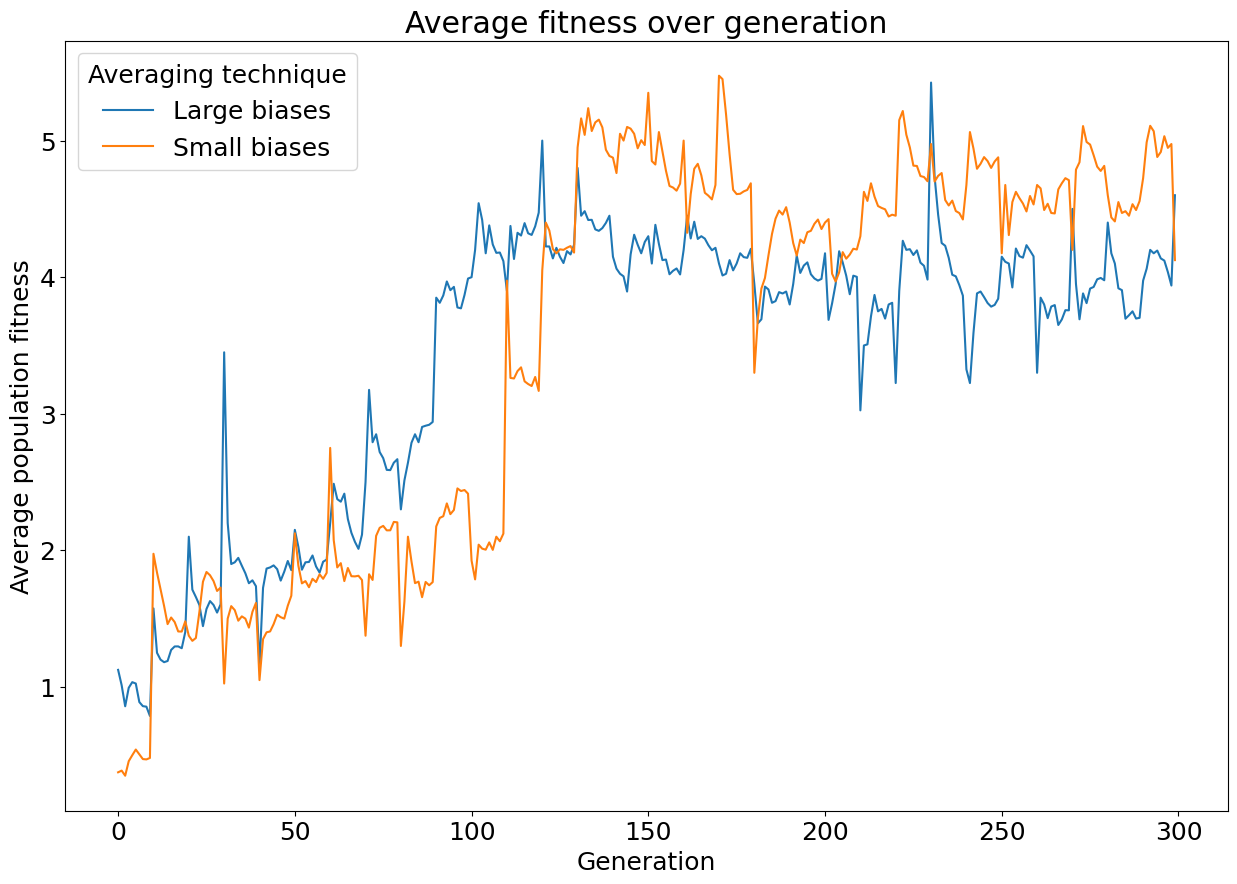

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({"font.size" : 18})

larger_biases = pd.read_csv("trials/fitness_cleaned/averages_150rand_150self_10avg_runco_largerbiases.csv", index_col=0, header=None)[1]
standard_biases = pd.read_csv("trials/fitness_cleaned/averages_150rand_150self_10avg_runco.csv", index_col=0, header=None)[1]

avg_df = pd.DataFrame({"Large biases" : larger_biases, "Small biases": standard_biases})

plt.figure(figsize=(15, 10))
plt.plot(avg_df)
plt.legend(labels = avg_df.columns, title="Averaging technique")
plt.title("Average fitness over generation")
plt.xlabel("Generation")
plt.ylabel("Average population fitness")
plt.savefig("plots/avg_fit_150rand_150self_averages_runco_10avg_smallbiases_vs_largerbiases", dpi=300)

In [9]:
fitnesses.players[0]

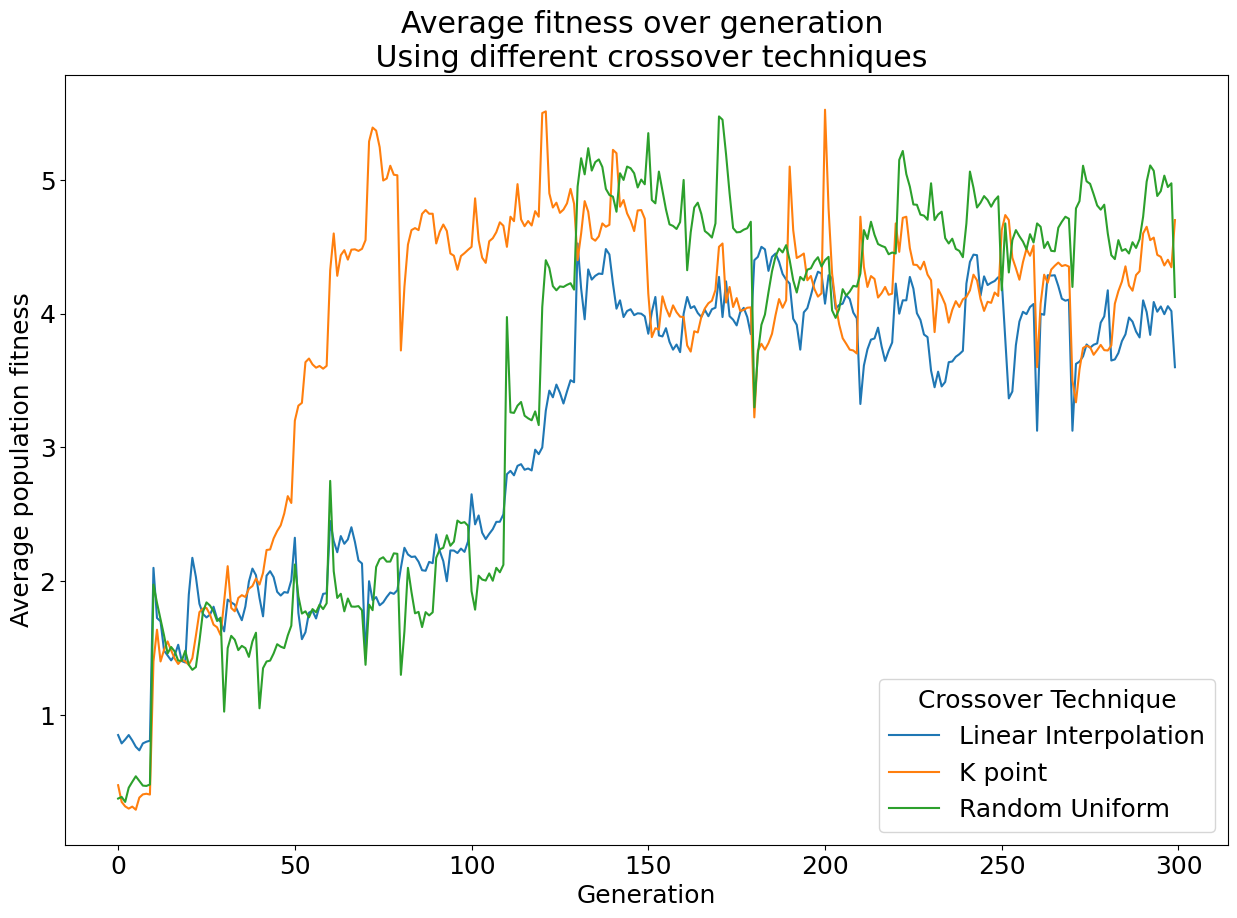

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({"font.size": 18})

# https://stackoverflow.com/questions/13557559/how-to-write-read-pandas-series-to-from-csv
lin_int_series = pd.read_csv("trials/fitness_cleaned/averages_150rand_150self_10avg_lintintco.csv", index_col=0, header=None)[1]
k_point_series = pd.read_csv("trials/fitness_cleaned/averages_150rand_150self_10avg_kpco.csv", index_col=0, header=None)[1]
r_unif_series = pd.read_csv("trials/fitness_cleaned/averages_150rand_150self_10avg_runco.csv", index_col=0, header=None)[1]

fitness_df = pd.DataFrame({'Linear Interpolation' : lin_int_series, "K point": k_point_series, "Random Uniform" : r_unif_series})


# fitness_pd = lin_int_series.to_frame().join(k_point_series)

plt.figure(figsize=(15, 10))
plt.plot(fitness_df)
plt.title("Average fitness over generation \n Using different crossover techniques")
plt.xlabel("Generation")
plt.ylabel("Average population fitness")
plt.legend(labels=fitness_df.columns, title="Crossover Technique")
plt.savefig("plots/avg_fit_150rand_150self_averages_10avg_allco", dpi=300)
# plt.st(style=['-', '--', '-.'], marker=['o', 's', '^'])

C:\Users\Hugo\anaconda3\envs\aiml402\lib\site-packages\pandas\core\indexes\base.py:911: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


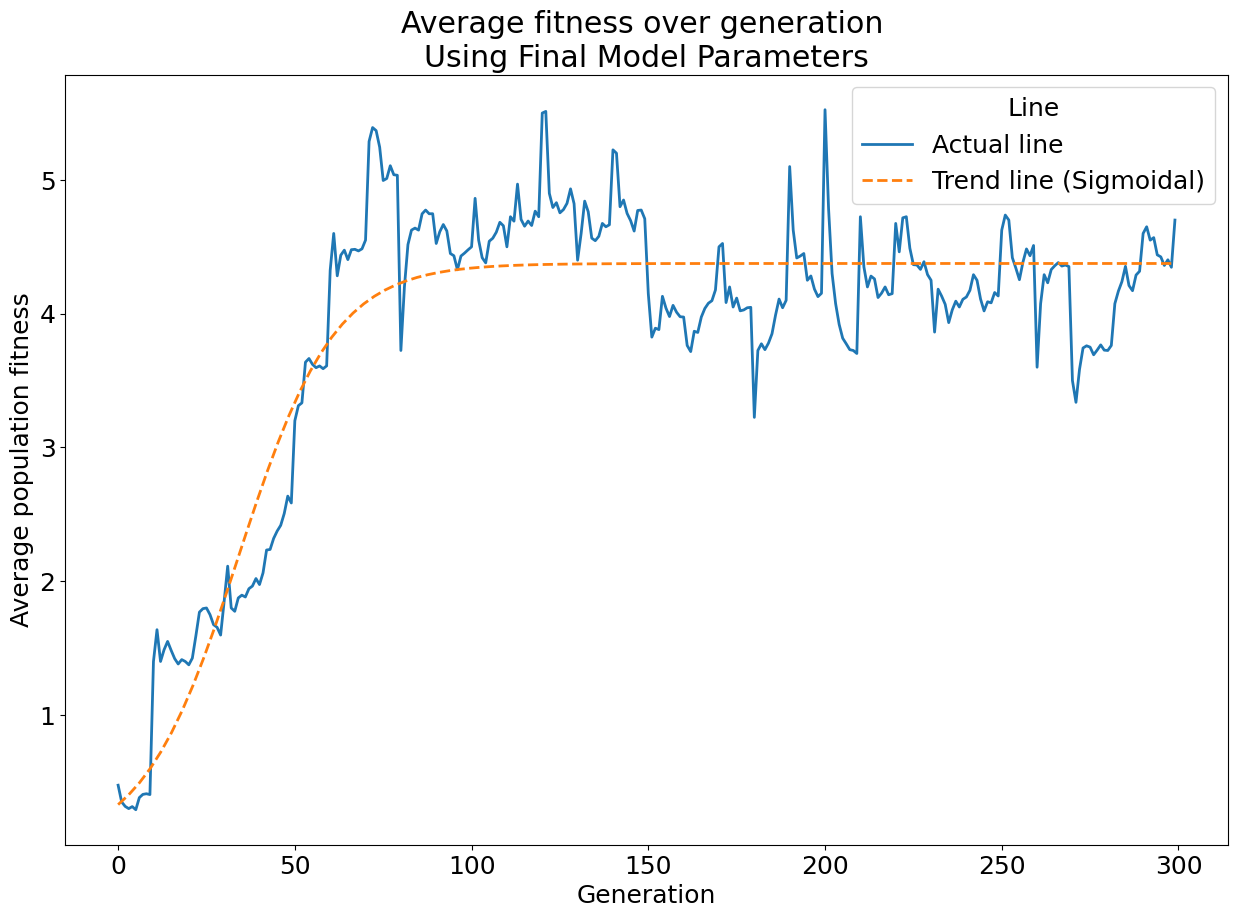

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.optimize import curve_fit

matplotlib.rcParams.update({"font.size": 18})

k_point_series = pd.read_csv("trials/fitness_cleaned/averages_150rand_150self_10avg_kpco.csv", index_col=0, header=None)[1]

def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-c * (x - b)))

x_range = np.linspace(k_point_series.index[1:].min(), k_point_series.index[1:].max(), 100)
params, covariance = curve_fit(sigmoid, xdata =k_point_series.index[1:], ydata=k_point_series[0:])
a_fit, b_fit, c_fit = params
y_trend_line = sigmoid(x_range, a_fit, b_fit, c_fit)

plt.figure(figsize=(15, 10))
plt.plot(k_point_series, lw = 2)
plt.plot(x_range, y_trend_line, lw=2, linestyle ="--")
plt.legend(labels=["Actual line", "Trend line (Sigmoidal)"], title="Line")
plt.title("Average fitness over generation \nUsing Final Model Parameters")
plt.xlabel("Generation")
plt.ylabel("Average population fitness")
plt.savefig("plots/avg_fit_150rand_150self_averages_10avg_allco", dpi=300)

In [56]:
k_point_series.index[1:].max()

299.0